Train a logistic regression model to make predictions in a binary classification context. We will use the Statlog Shuttle dataset from UCI.

The Dataset

Each record contains 9 numerical attributes. The response is actually multiclass with 7 classes/outcomes, but you will convert the response into a binary one before building our logistic regression models.

In [14]:
# Import packages

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

import itertools

In [4]:
# Load and prepare the dataset

df_train_data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/shuttle/shuttle.tst', header=None, sep=' ')

df_train_data[9] = np.where(df_train_data[9] == 1, 1, 0)

X = df_train_data.drop([9], axis=1)

y = df_train_data[9]
X_train, X_test, y_train, y_test = train_test_split(X, y)

print('There are {:d} training samples and {:d} test samples'.format(X_train.shape[0], X_test.shape[0]))
                                                                     

There are 10875 training samples and 3625 test samples


In [5]:
X_train.head()

,0,1,2,3,4,5,6,7,8
10631,37,0,77,0,-6,22,41,85,44
411,38,0,82,0,38,6,44,43,0
4493,64,0,113,1,64,21,49,48,0
13355,37,4,100,0,34,0,64,67,4
4105,55,2,84,0,54,-6,29,30,2


In [6]:
# Create the logistic regression model

lr = LogisticRegression(penalty='none', max_iter=1000)
lr.fit(X_train, y_train)
lr.coef_

array([[ 1.13916923e-01,  2.77573445e-03, -1.57834250e-01,
         1.30868693e-03, -4.71082827e-01, -4.62897994e-04,
         9.40649187e-01, -8.40352673e-01,  1.68017683e-01]])

In [7]:
# Calculate model accuracy

lr_score = lr.score(X_test, y_test)

print('Accuracy of Logistic Regression: {:.3f}'.format(lr_score))

Accuracy of Logistic Regression: 0.973


In [8]:
# Create a dummy classifier 

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)
round(dummy.score(X_test, y_test), 3)

0.796

In [9]:
# Confusion Matrix

predictions = lr.predict(X_test)

confusion = confusion_matrix(y_test, predictions)
print(confusion)

[[ 680   60]
 [  38 2847]]


In [17]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

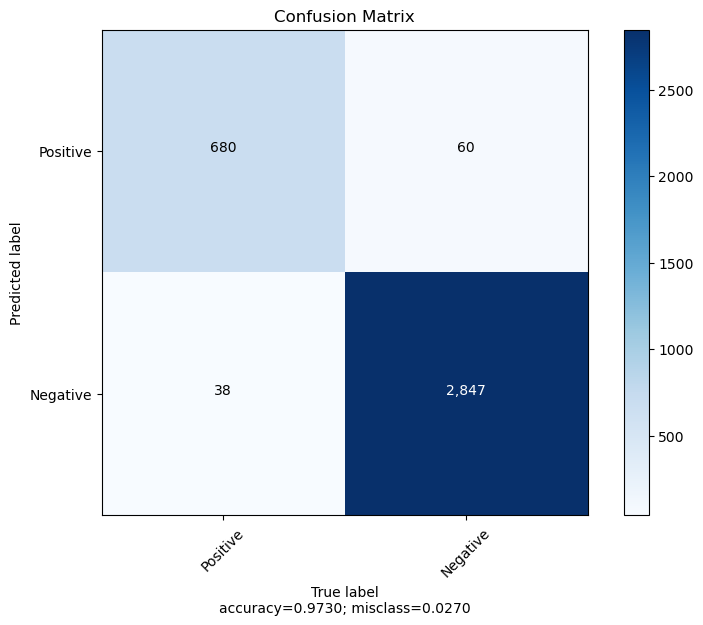

In [18]:
# Plot a confusion matrix

plot_confusion_matrix(cm=confusion, target_names = ['Positive', 'Negative'], title = 'Confusion Matrix',normalize=False)

In [19]:
# Calculate model metrics

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
fbeta_precision = fbeta_score(y_test, predictions, beta=0.5)
fbeta_recall = fbeta_score(y_test, predictions, beta=2)

print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))
print('Fbeta score favoring precision: {:.2f}'.format(fbeta_precision))
print('FBeta score favoring recall: {:.2f}'.format(fbeta_recall))

Accuracy score: 0.97
Precision score: 0.98
Recall score: 0.99
F1 score: 0.98
Fbeta score favoring precision: 0.98
FBeta score favoring recall: 0.99


In [20]:
# Print a classification report

report = classification_report(y_test, predictions, target_names=['Negative', 'Positive'])
print(report)

              precision    recall  f1-score   support

    Negative       0.95      0.92      0.93       740
    Positive       0.98      0.99      0.98      2885

    accuracy                           0.97      3625
   macro avg       0.96      0.95      0.96      3625
weighted avg       0.97      0.97      0.97      3625



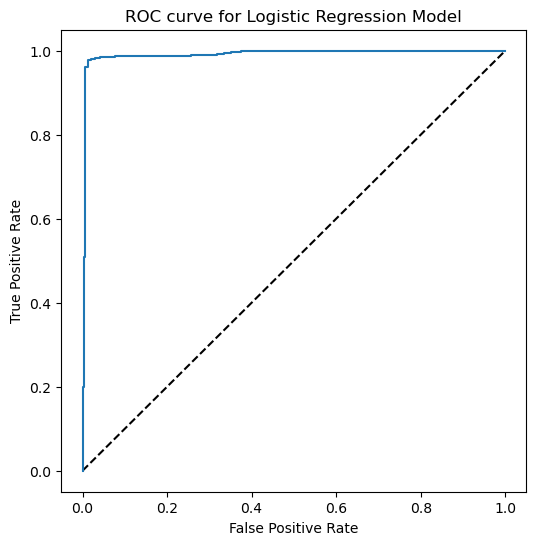

Area under the ROC curve: 0.991


In [21]:
# Plot ROC Curve and AUC

probs = lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
fig = plt.figure(figsize = (6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Logistic Regression Model')
plt.show()

auc = roc_auc_score(y_test, probs)
print('Area under the ROC curve: {:.3f}'.format(auc))

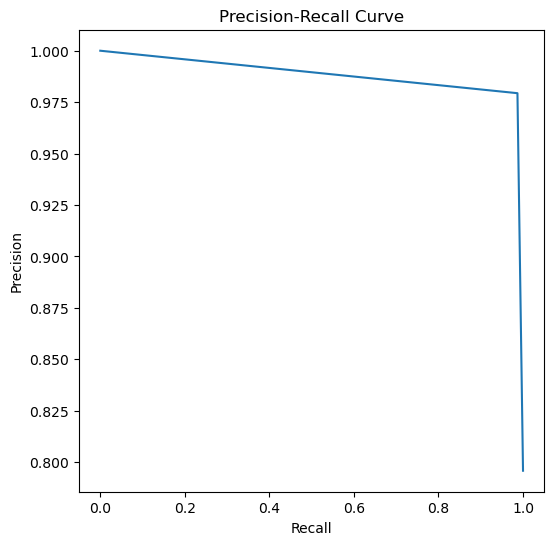

In [22]:
# Plot Precision-Recall Curve

pres, rec, thresholds = precision_recall_curve(y_test, predictions)
fig = plt.figure(figsize = (6, 6))
plt.plot(rec, pres)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


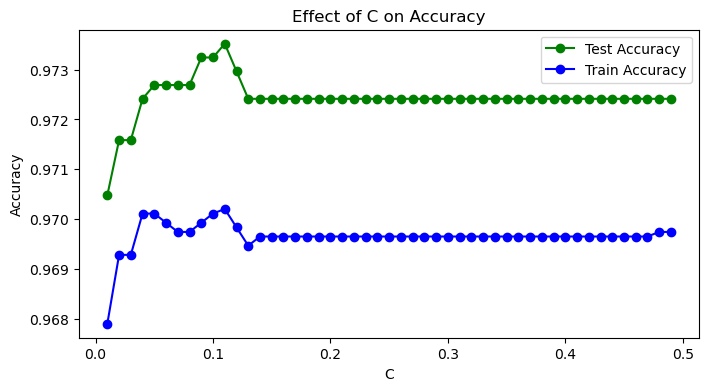

In [23]:
# Parameter Tuning

c_vals = np.arange(0.01, 0.5, 0.01)
test_accuracy = []
train_accuracy = []

for c in c_vals:
  lr = LogisticRegression(penalty='l2', C=c, max_iter=1000)
  lr.fit(X_train, y_train)
  test_accuracy.append(lr.score(X_test, y_test))
  train_accuracy.append(lr.score(X_train, y_train))

fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(c_vals, test_accuracy, '-g', marker = "o", label='Test Accuracy')
ax1.plot(c_vals, train_accuracy, '-b', marker = "o", label='Train Accuracy')
ax1.set(xlabel='C', ylabel='Accuracy')
ax1.set_title('Effect of C on Accuracy')
ax1.legend()
plt.show()

In [24]:
# Best value for c and best test accuracy

best_test_accuracy = max(test_accuracy)

print(f"Best value for C: {c_vals[test_accuracy.index(best_test_accuracy)]}")
print(f"Best test accuracy: {round(best_test_accuracy, 3)}")

Best value for C: 0.11
Best test accuracy: 0.974


In [25]:
# Cross Validation

clf = LogisticRegression(solver='lbfgs', max_iter=1000)
cv_scores = cross_val_score(clf, X_train, y_train, cv = 5)

print('Accuracy scores for the 5 folds: ', cv_scores)
print('Mean cross validation score: {:.3f}'.format(np.mean(cv_scores)))

Accuracy scores for the 5 folds:  [0.96735632 0.9737931  0.96643678 0.96781609 0.96735632]
Mean cross validation score: 0.969
